📌 Import Required Libraries

In [59]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

 Connect to MySQL Database

In [70]:
db_config = {
    "host": "localhost",       # Change this if MySQL is running on another host
    "user": "root",   # Replace with your MySQL username
    "password": "Kavya2010@",  # Replace with your MySQL password
    "database": "kavyadb"      # Your database name
}

try:
    conn = mysql.connector.connect(**db_config)
    cursor = conn.cursor()
    print("✅ Connected to MySQL database successfully!")
except mysql.connector.Error as err:
    print(f"❌ Error: {err}")

✅ Connected to MySQL database successfully!


Retrieve Data from MySQL

In [61]:
query_customer_journey = "SELECT * FROM CustomerJourney;"
query_customer_reviews = "SELECT * FROM CustomerReviews;"
query_customers = "SELECT * FROM Customers;"
query_engagement_data = "SELECT * FROM EngagementData;"
query_geography = "SELECT * FROM Geography;"
query_products = "SELECT * FROM Products;"

df_journey = pd.read_sql(query_customer_journey, conn)
df_reviews = pd.read_sql(query_customer_reviews, conn)
df_customers = pd.read_sql(query_customers, conn)
df_engagement = pd.read_sql(query_engagement_data, conn)
df_geography = pd.read_sql(query_geography, conn)
df_products = pd.read_sql(query_products, conn)


# Display first few rows of each table (optional, for verification)
print("Customer Journey Data:")
print(df_journey.head(), "\n")

print("Customer Reviews Data:")
print(df_reviews.head(), "\n")

print("Customers Data:")
print(df_customers.head(), "\n")

print("Engagement Data:")
print(df_engagement.head(), "\n")

print("Geography Data:")
print(df_geography.head(), "\n")

print("Products Data:")
print(df_products.head(), "\n")

Customer Journey Data:
   JourneyID  CustomerID  ProductID   VisitDate        Stage    Action  \
0          1          64         18  2024-06-10     Checkout  Drop-off   
1          2          94         11  2025-07-09     Checkout  Drop-off   
2          3          34          8  2024-06-14  ProductPage      View   
3          4          33         18  2025-05-28     Checkout  Drop-off   
4          5          91         10  2023-02-11     Homepage     Click   

   Duration  
0       NaN  
1       NaN  
2     235.0  
3       NaN  
4     156.0   

Customer Reviews Data:
   ReviewID  CustomerID  ProductID  ReviewDate  Rating  \
0         1          77         18  2023-12-23       3   
1         2          80         19  2024-12-25       5   
2         3          50         13  2025-01-26       4   
3         4          78         15  2025-04-21       3   
4         5          64          2  2023-07-16       3   

                                 ReviewText  SentimentScore SentimentLabel

C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\3151275467.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_journey = pd.read_sql(query_customer_journey, conn)
C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\3151275467.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_reviews = pd.read_sql(query_customer_reviews, conn)
C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\3151275467.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customers = pd.read_sql(query_customers, conn)
C:\Users\kavya\AppData\Local\

Data Cleaning & Exploration

In [62]:
# Check for missing values in each column
print(df_journey.isnull().sum())
print(df_reviews.isnull().sum())
print(df_customers.isnull().sum())
print(df_engagement.isnull().sum())
print(df_geography.isnull().sum())
print(df_products.isnull().sum())


JourneyID      0
CustomerID     0
ProductID      0
VisitDate      0
Stage          0
Action         0
Duration      14
dtype: int64
ReviewID          0
CustomerID        0
ProductID         0
ReviewDate        0
Rating            0
ReviewText        0
SentimentScore    0
SentimentLabel    0
dtype: int64
CustomerID      0
CustomerName    0
Email           0
Gender          0
Age             0
GeographyID     0
dtype: int64
EngagementID      0
ContentID         0
ContentType       0
Likes             0
EngagementDate    0
CampaignID        0
ProductID         0
Views             0
Clicks            0
dtype: int64
GeographyID    0
Country        0
City           0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [63]:
# Fill numerical missing values with 0
df_journey.fillna(0, inplace=True)

# Fill categorical missing values with "Unknown"
df_journey.fillna("Unknown", inplace=True)

df_journey.dropna(inplace=True)

 Customer Journey & Engagement Analysis

(a) Drop-off Points Analysis

In [64]:

# ✅ Run the query
query_dropoff = "SELECT Stage, COUNT(*) AS DropOffCount FROM CustomerJourney WHERE Action = 'Drop-off' GROUP BY Stage;"
df_dropoff = pd.read_sql(query_dropoff, conn)


print(tabulate(df_dropoff, headers='keys', tablefmt='grid'))


+----+----------+----------------+
|    | Stage    |   DropOffCount |
+====+==========+================+
|  0 | Checkout |             14 |
+----+----------+----------------+


C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\698923816.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dropoff = pd.read_sql(query_dropoff, conn)


(b) Common Actions Leading to Successful Conversions

In [74]:
# Query to get common actions before conversion
query_conversion = """
SELECT Action, COUNT(*) AS ActionCount 
FROM CustomerJourney 
WHERE Stage = 'Checkout' AND Action <> 'Drop-off'
GROUP BY Action
ORDER BY ActionCount DESC;
"""
df_conversion = pd.read_sql(query_conversion, conn)

print(tabulate(df_conversion, headers='keys', tablefmt='grid'))

+----+----------+---------------+
|    | Action   |   ActionCount |
+====+==========+===============+
|  0 | Purchase |             6 |
+----+----------+---------------+


C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\1767036148.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_conversion = pd.read_sql(query_conversion, conn)


c. Average Duration per Stage

+----+-------------+---------------+
|    | Stage       |   AvgDuration |
+====+=============+===============+
|  0 | Checkout    |       150.167 |
+----+-------------+---------------+
|  1 | ProductPage |       182.769 |
+----+-------------+---------------+
|  2 | Homepage    |       160.537 |
+----+-------------+---------------+


C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\4087777262.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_duration = pd.read_sql(query_duration, conn)
C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\4087777262.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_duration["Stage"], y=df_duration["AvgDuration"], palette="magma")


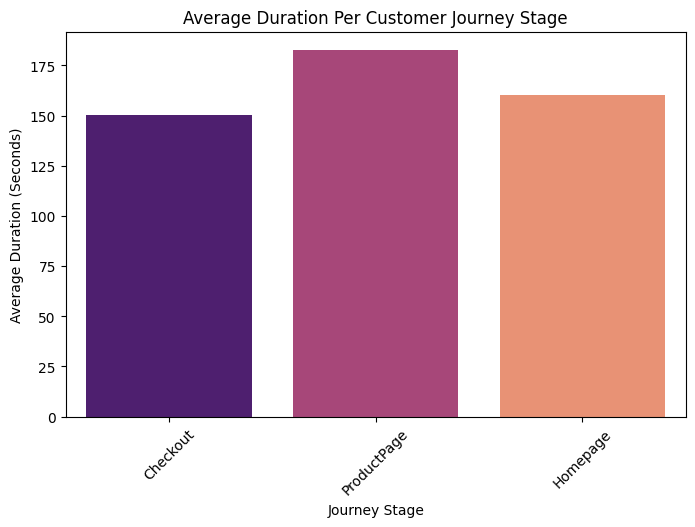

In [66]:
# Query to calculate average duration per stage
query_duration = "SELECT Stage, AVG(Duration) AS AvgDuration FROM CustomerJourney GROUP BY Stage;"
df_duration = pd.read_sql(query_duration, conn)

print(tabulate(df_duration, headers='keys', tablefmt='grid'))

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=df_duration["Stage"], y=df_duration["AvgDuration"], palette="magma")
plt.title("Average Duration Per Customer Journey Stage")
plt.xlabel("Journey Stage")
plt.ylabel("Average Duration (Seconds)")
plt.xticks(rotation=45)
plt.show()


Customer Reviews Analysis

(a) Highest & Lowest Rated Products

C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\67736812.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ratings = pd.read_sql(query_ratings, conn)
C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\67736812.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_ratings["ProductID"], y=df_ratings["AvgRating"], palette="Blues")


    ProductID  AvgRating
0           8     5.0000
1          19     4.4000
2           1     4.0000
3           5     4.0000
4          11     4.0000
5          15     4.0000
6          18     4.0000
7          20     4.0000
8          17     3.8889
9           6     3.8571
10          3     3.7143
11         13     3.6667
12          2     3.5714
13         10     3.5000
14          9     3.4000
15         16     3.4000
16          4     3.0000
17         12     3.0000
18          7     2.6667


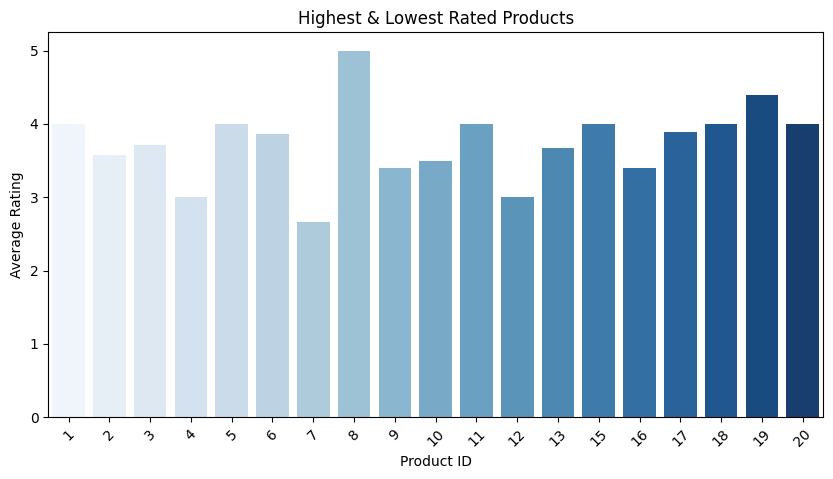

In [75]:
# Query to get highest and lowest rated products
query_ratings = """
SELECT ProductID, AVG(Rating) AS AvgRating 
FROM CustomerReviews 
GROUP BY ProductID 
ORDER BY AvgRating DESC;
"""
df_ratings = pd.read_sql(query_ratings, conn)

print(df_ratings)

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=df_ratings["ProductID"], y=df_ratings["AvgRating"], palette="Blues")
plt.title("Highest & Lowest Rated Products")
plt.xlabel("Product ID")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\423420239.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_products = pd.read_sql("SELECT * FROM top_engaging_products_view", conn)
C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\423420239.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_least_products = pd.read_sql("SELECT * FROM least_engaging_products_view", conn)
C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\423420239.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ProductName", y="TotalEngagement

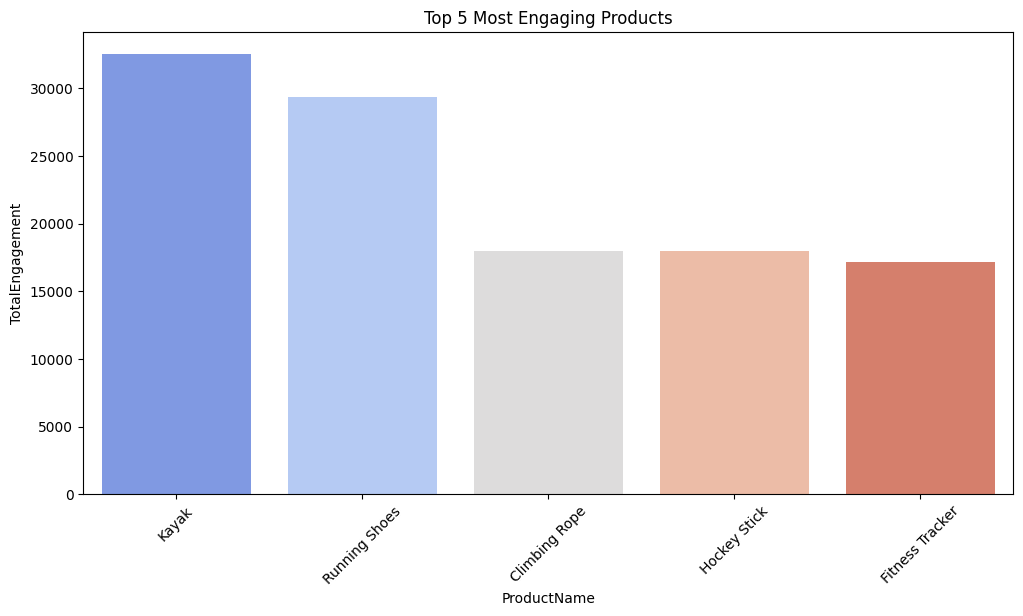

C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\423420239.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ProductName", y="TotalEngagement", data=df_least_products, palette="magma")


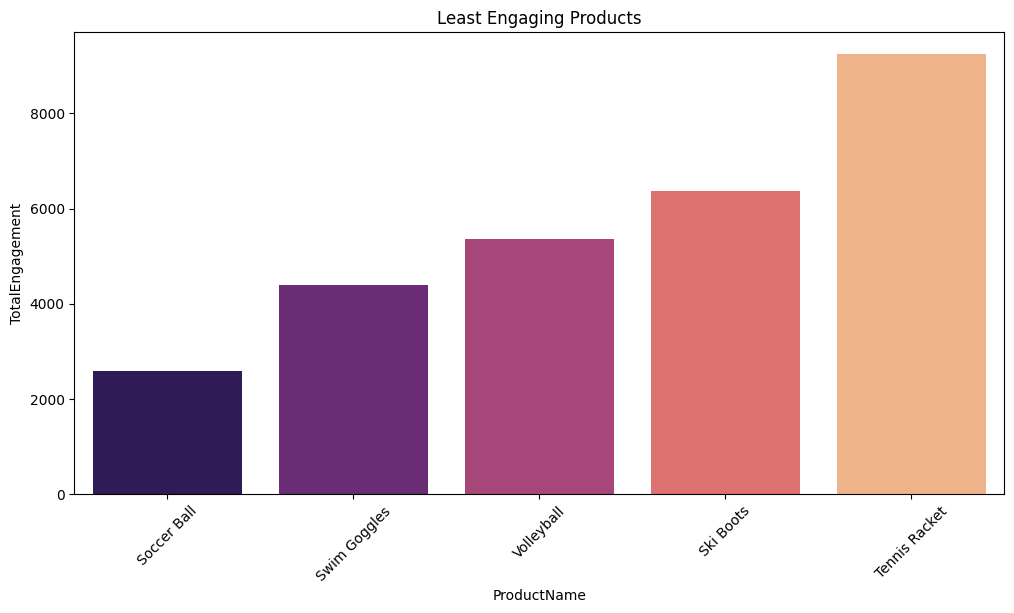

In [78]:

df_top_products = pd.read_sql("SELECT * FROM top_engaging_products_view", conn)
df_least_products = pd.read_sql("SELECT * FROM least_engaging_products_view", conn)


# 🔹 Top 5 Engaging Products
plt.figure(figsize=(12, 6))
sns.barplot(x="ProductName", y="TotalEngagement", data=df_top_products, palette="coolwarm")
plt.title("Top 5 Most Engaging Products")
plt.xticks(rotation=45)
plt.show()

# 🔹 Least Engaging Products
plt.figure(figsize=(12, 6))
sns.barplot(x="ProductName", y="TotalEngagement", data=df_least_products, palette="magma")
plt.title("Least Engaging Products")
plt.xticks(rotation=45)
plt.show()

(b) Basic Sentiment Analysis

In [68]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Fetch all reviews with ratings
query = "SELECT ReviewID, ReviewText, Rating FROM CustomerReviews"
cursor.execute(query)
reviews = cursor.fetchall()

# Convert to DataFrame
df_reviews = pd.DataFrame(reviews, columns=["ReviewID", "ReviewText", "Rating"])

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment score
def get_sentiment_score(text):
    if not text or text.strip() == "":
        return 0.0  # Handle empty reviews
    return sia.polarity_scores(text)["compound"]

# Function to assign sentiment label based on rating
def assign_sentiment_label(rating):
    if rating in [4, 5]:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif rating in [1, 2]:
        return "Negative"
    return "Unknown"  # Handle unexpected cases

# Apply sentiment analysis
df_reviews["SentimentScore"] = df_reviews["ReviewText"].apply(lambda text: get_sentiment_score(str(text)))
df_reviews["SentimentLabel"] = df_reviews["Rating"].apply(assign_sentiment_label)

# Update all rows in the database
for index, row in df_reviews.iterrows():
    cursor.execute(
        """
        UPDATE CustomerReviews 
        SET SentimentScore = %s, SentimentLabel = %s 
        WHERE ReviewID = %s
        """,
        (row["SentimentScore"], row["SentimentLabel"], row["ReviewID"])
    )

# Commit and close connection
conn.commit()
conn.close()

print("Sentiment scores and labels updated based on ratings!")


Sentiment scores and labels updated based on ratings!


Sentiment Analysis from Customer Reviews

In [71]:
query1 = """
    SELECT SentimentLabel, COUNT(*) AS SentimentCount
    FROM CustomerReviews
    GROUP BY SentimentLabel;
"""

df1 = pd.read_sql(query1, conn)
print("Customer Sentiment table:\n")
print(tabulate(df1, headers='keys', tablefmt='grid'))

Customer Sentiment table:

+----+------------------+------------------+
|    | SentimentLabel   |   SentimentCount |
+====+==================+==================+
|  0 | Neutral          |               29 |
+----+------------------+------------------+
|  1 | Positive         |               62 |
+----+------------------+------------------+
|  2 | Negative         |                9 |
+----+------------------+------------------+


C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\3113087673.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query1, conn)


Key Complaints and Negative Reviews

In [ ]:
query2 = """
   SELECT ProductID, COUNT(ReviewID) AS NegativeReviewCount
    FROM CustomerReviews
    WHERE SentimentLabel = 'Negative'
    GROUP BY ProductID
    ORDER BY NegativeReviewCount DESC;

"""

df2 = pd.read_sql(query2, conn)
print("Key Complaints and Negative Reviews:\n")
print(tabulate(df2, headers='keys', tablefmt='grid'))


Key Complaints and Negative Reviews:

+----+-------------+-----------------------+
|    |   ProductID |   NegativeReviewCount |
+====+=============+=======================+
|  0 |           2 |                     1 |
+----+-------------+-----------------------+
|  1 |           3 |                     1 |
+----+-------------+-----------------------+
|  2 |           4 |                     1 |
+----+-------------+-----------------------+
|  3 |           6 |                     1 |
+----+-------------+-----------------------+
|  4 |           7 |                     1 |
+----+-------------+-----------------------+
|  5 |          10 |                     1 |
+----+-------------+-----------------------+
|  6 |          15 |                     1 |
+----+-------------+-----------------------+
|  7 |          16 |                     1 |
+----+-------------+-----------------------+
|  8 |          17 |                     1 |
+----+-------------+-----------------------+


C:\Users\kavya\AppData\Local\Temp\ipykernel_31052\1721583461.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, conn)


Negative Reviews and Product Performance

In [ ]:

query3 = """
     SELECT P.ProductID, 
           P.ProductName, 
           SUM(CASE WHEN R.SentimentLabel = 'Negative' THEN 1 ELSE 0 END) AS NegativeReviewCount,
           COUNT(R.ReviewID) AS TotalReviews,
           ROUND((SUM(CASE WHEN R.SentimentLabel = 'Negative' THEN 1 ELSE 0 END) * 100.0) / NULLIF(COUNT(R.ReviewID), 0), 2) AS NegativeReviewPercentage
    FROM CustomerReviews R
    JOIN Products P ON R.ProductID = P.ProductID
    GROUP BY P.ProductID, P.ProductName
    HAVING TotalReviews > 0
    ORDER BY NegativeReviewCount DESC;
"""


# Fetch data from SQL and store it in a DataFrame
df3 = pd.read_sql(query3, conn)

# Print table format
print("Negative Reviews and Product Performance:\n")
print(tabulate(df3, headers='keys', tablefmt='grid'))



Negative Reviews and Product Performance:

+----+-------------+-----------------+-----------------------+----------------+----------------------------+
|    |   ProductID | ProductName     |   NegativeReviewCount |   TotalReviews |   NegativeReviewPercentage |
+====+=============+=================+=======================+================+============================+
|  0 |           2 | Fitness Tracker |                     1 |              7 |                      14.29 |
+----+-------------+-----------------+-----------------------+----------------+----------------------------+
|  1 |           3 | Yoga Mat        |                     1 |              7 |                      14.29 |
+----+-------------+-----------------+-----------------------+----------------+----------------------------+
|  2 |           4 | Dumbbells       |                     1 |              5 |                      20    |
+----+-------------+-----------------+-----------------------+----------------+------

C:\Users\kavya\AppData\Local\Temp\ipykernel_31052\752680759.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query3, conn)


Customer Segmentation Based on Purchase Behavior

In [ ]:
query2 = """
    SELECT C.CustomerID,
           C.CustomerName,
           COUNT(J.JourneyID) AS TotalJourneys,
           COUNT(R.ReviewID) AS TotalReviews,
           CASE 
               WHEN COUNT(J.JourneyID) > 5 THEN 'Loyal Customer'
               WHEN COUNT(J.JourneyID) BETWEEN 4 AND 6 THEN 'Regular Customer'
               ELSE 'Occasional Customer'
           END AS CustomerSegment
    FROM Customers C
    LEFT JOIN CustomerJourney J ON C.CustomerID = J.CustomerID
    LEFT JOIN CustomerReviews R ON C.CustomerID = R.CustomerID
    GROUP BY C.CustomerID, C.CustomerName
    ORDER BY TotalJourneys DESC;
"""

df2 = pd.read_sql(query2, conn)
print("Customer Segmentation Based on Purchase Behavior:\n")
print(tabulate(df2, headers='keys', tablefmt='grid'))



Customer Segmentation Based on Purchase Behavior:

+----+--------------+-------------------+-----------------+----------------+---------------------+
|    |   CustomerID | CustomerName      |   TotalJourneys |   TotalReviews | CustomerSegment     |
+====+==============+===================+=================+================+=====================+
|  0 |           93 | Jane Rodriguez    |              12 |             12 | Loyal Customer      |
+----+--------------+-------------------+-----------------+----------------+---------------------+
|  1 |            9 | Emily Thomas      |               6 |              6 | Loyal Customer      |
+----+--------------+-------------------+-----------------+----------------+---------------------+
|  2 |           54 | Michael Gonzalez  |               6 |              6 | Loyal Customer      |
+----+--------------+-------------------+-----------------+----------------+---------------------+
|  3 |           64 | Sarah Martinez    |               6 

C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\2585024308.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, conn)


(c) Review Trends vs. Product Performance



In [76]:
# Query to analyze review trends with product performance
query_review_trends = """
SELECT cr.ProductID, AVG(cr.Rating) AS AvgRating, COUNT(cr.ReviewID) AS ReviewCount, p.Price
FROM CustomerReviews cr
JOIN Products p ON cr.ProductID = p.ProductID
GROUP BY cr.ProductID, p.Price;
"""
df_review_trends = pd.read_sql(query_review_trends, conn)

print(df_review_trends)


    ProductID  AvgRating  ReviewCount   Price
0           1     4.0000            4  223.75
1           2     3.5714            7  196.68
2           3     3.7143            7  485.32
3           4     3.0000            5   26.21
4           5     4.0000            3   41.26
5           6     3.8571            7   36.07
6           7     2.6667            3  225.12
7           8     5.0000            3   44.75
8           9     3.4000            5  327.36
9          10     3.5000            4   81.59
10         11     4.0000            6  340.20
11         12     3.0000            2   37.56
12         13     3.6667            9  145.97
13         15     4.0000            6  410.17
14         16     3.4000           10  259.40
15         17     3.8889            9  275.43
16         18     4.0000            3   42.80
17         19     4.4000            5  173.83
18         20     4.0000            2  262.32


C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\2441335287.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_review_trends = pd.read_sql(query_review_trends, conn)


 Marketing Effectiveness Analysis
 
(a) Customer Retention Rate

In [73]:
query_retention = """
WITH LastYearCustomers AS (
    SELECT DISTINCT CustomerID
    FROM CustomerReviews
    WHERE ReviewDate BETWEEN '2023-03-01' AND '2024-02-29'
),
ThisYearCustomers AS (
    SELECT DISTINCT CustomerID
    FROM CustomerReviews
    WHERE ReviewDate BETWEEN '2024-03-01' AND '2025-02-28'
),
ReturningCustomers AS (
    SELECT COUNT(DISTINCT L.CustomerID) AS returning_count
    FROM LastYearCustomers L
    INNER JOIN ThisYearCustomers T ON L.CustomerID = T.CustomerID
),
TotalCustomers AS (
    SELECT COUNT(DISTINCT CustomerID) AS total_count FROM CustomerReviews
    WHERE ReviewDate BETWEEN '2024-03-01' AND '2025-02-28'
)

SELECT 
    (R.returning_count * 100.0 / NULLIF(T.total_count, 0)) AS retention_rate
FROM ReturningCustomers R, TotalCustomers T;

"""

# Execute the revised query
df_retention = pd.read_sql(query_retention, conn)

# Print result
if not df_retention.empty and 'retention_rate' in df_retention.columns:
    retention_rate = df_retention['retention_rate'][0]
    print(f"Customer Retention Rate: {retention_rate:.2f}%")
else:
    print("No customer data available.")




Customer Retention Rate: 34.78%


C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\3569885919.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_retention = pd.read_sql(query_retention, conn)


(b) Repeat vs. First-Time Buyers

First-Time Buyer: 39 customers
Repeat Buyer: 26 customers


C:\Users\kavya\AppData\Local\Temp\ipykernel_31052\3459284553.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_buyers = pd.read_sql(query_buyers, conn)


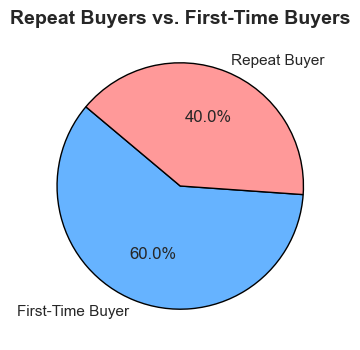

In [ ]:

# Execute SQL query
query_buyers = """
SELECT 
    CASE 
        WHEN COUNT(*) > 1 THEN 'Repeat Buyer' 
        ELSE 'First-Time Buyer' 
    END AS BuyerType, 
    COUNT(DISTINCT CustomerID) AS CustomerCount
FROM CustomerJourney 
GROUP BY CustomerID;
"""
df_buyers = pd.read_sql(query_buyers, conn)

# Aggregate the counts correctly
df_final = df_buyers.groupby("BuyerType")["CustomerCount"].sum().reset_index()

# Print the count of each category
for index, row in df_final.iterrows():
    print(f"{row['BuyerType']}: {row['CustomerCount']} customers")

# Pie Chart Visualization
plt.figure(figsize=(6, 4))
plt.pie(
    df_final["CustomerCount"], 
    labels=df_final["BuyerType"], 
    autopct="%1.1f%%", 
    colors=["#66b3ff", "#ff9999"], 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

# Title
plt.title("Repeat Buyers vs. First-Time Buyers", fontsize=14, fontweight="bold")

# Show the plot
plt.show()


In [ ]:
# Execute SQL query
query_buyer = """
SELECT 
    CustomerSegment, 
    COUNT(*) AS CustomerCount
FROM (
    SELECT 
        c.CustomerID,
        CASE 
            WHEN COUNT(cj.CustomerID) > 1 THEN 'Repeat Customer' 
            WHEN COUNT(cj.CustomerID) = 1 THEN 'First-Time Buyer' 
            ELSE 'Inactive Customer' 
        END AS CustomerSegment
    FROM Customers c
    LEFT JOIN CustomerJourney cj ON c.CustomerID = cj.CustomerID
    GROUP BY c.CustomerID
) AS SubQuery
GROUP BY CustomerSegment;



"""
df_buyer = pd.read_sql(query_buyer, conn)
print("Customer Segmentation Based on Purchase Behavior:\n")
print(tabulate(df_buyer, headers='keys', tablefmt='grid'))



Customer Segmentation Based on Purchase Behavior:

+----+-------------------+-----------------+
|    | CustomerSegment   |   CustomerCount |
+====+===================+=================+
|  0 | Repeat Customer   |              26 |
+----+-------------------+-----------------+
|  1 | Inactive Customer |              35 |
+----+-------------------+-----------------+
|  2 | First-Time Buyer  |              39 |
+----+-------------------+-----------------+


C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\1790791711.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_buyer = pd.read_sql(query_buyer, conn)


(c) Best-Performing Products Per Region

C:\Users\kavya\AppData\Local\Temp\ipykernel_31052\1065530226.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_best_products = pd.read_sql(query_best_products, conn)


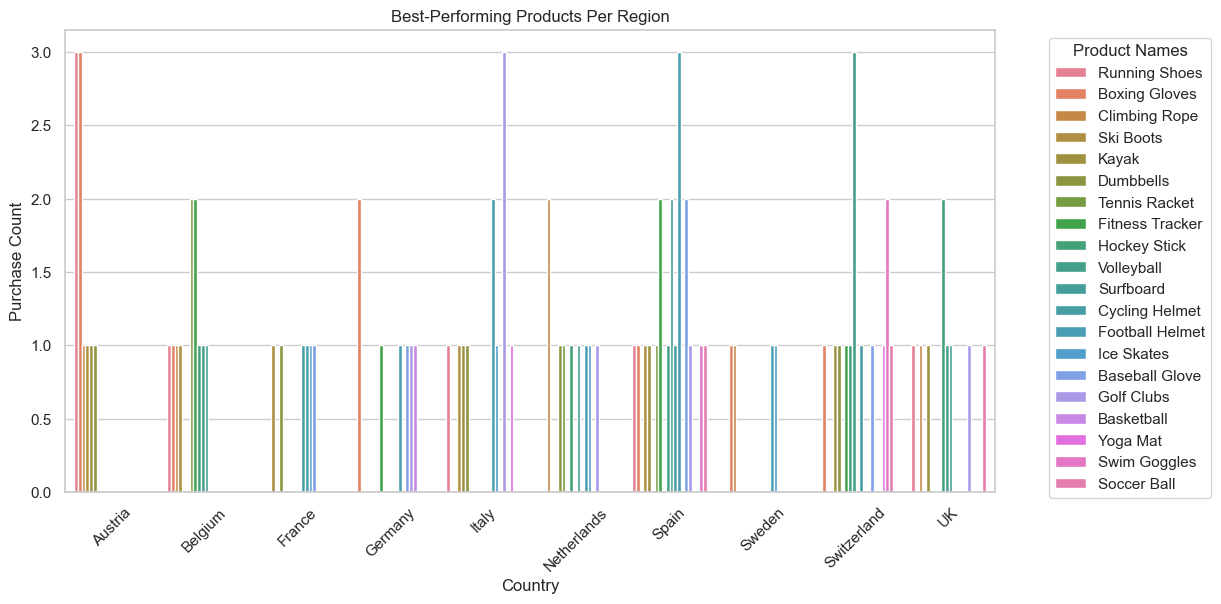

In [ ]:
# Query to fetch data
query_best_products = """
SELECT g.Country, p.ProductName, COUNT(cj.JourneyID) AS PurchaseCount
FROM CustomerJourney cj
JOIN Products p ON cj.ProductID = p.ProductID
JOIN Customers c ON cj.CustomerID = c.CustomerID
JOIN Geography g ON c.GeographyID = g.GeographyID
GROUP BY g.Country, p.ProductName
ORDER BY g.Country, PurchaseCount DESC;
"""
df_best_products = pd.read_sql(query_best_products, conn)


# Create a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x="Country", y="PurchaseCount", hue="ProductName", data=df_best_products)

# Adjust legend position (move to the right outside the plot)
plt.legend(title="Product Names", bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Labels and title
plt.xlabel("Country")
plt.ylabel("Purchase Count")
plt.title("Best-Performing Products Per Region")

plt.show()

● Track customer journey progress through different stages.

● Analyze customer reviews to understand sentiment and satisfaction.

● Identify high-value customers based on purchasing behavior.

● Measure marketing effectiveness through engagement and conversions.




C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\3091454459.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframes = {view: pd.read_sql(f"SELECT * FROM {view}", conn) for view in views}


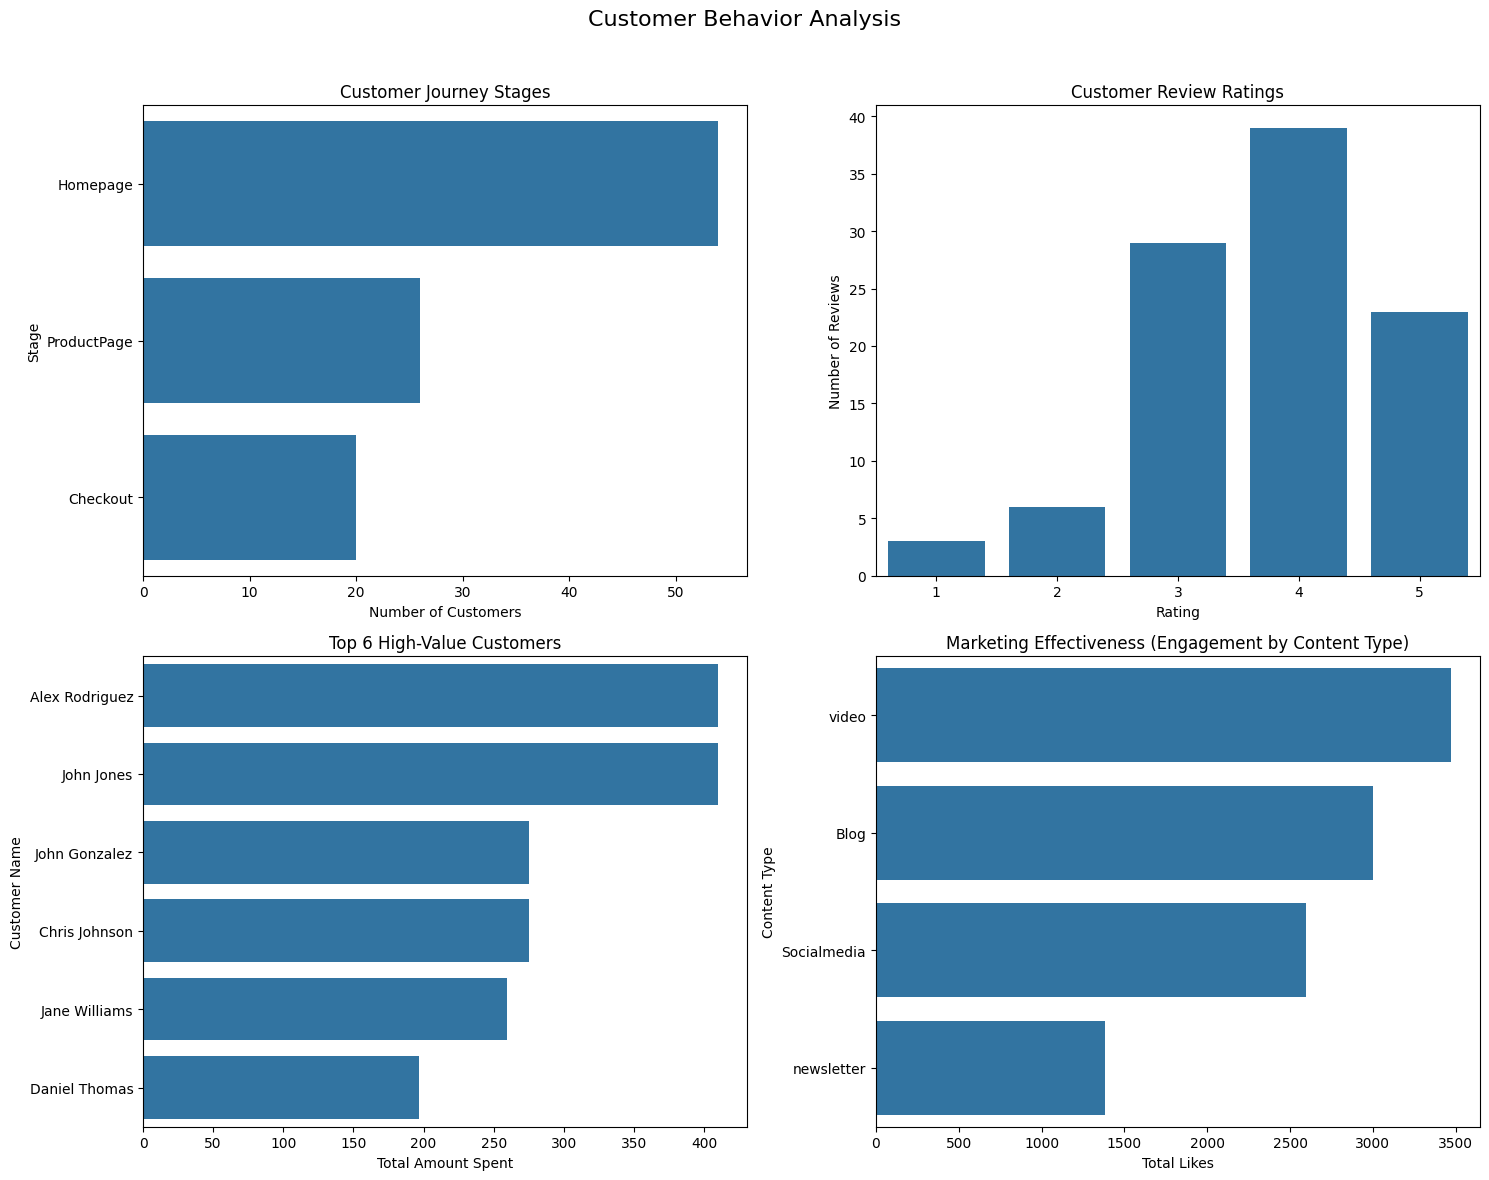

In [77]:
# List of views
views = [
    "customer_journey_view",
    "customer_sentiment_view",
    "high_value_customers_view",
    "marketing_effectiveness_view",
    "best_products_region_view"
]

# Fetch data from views
dataframes = {view: pd.read_sql(f"SELECT * FROM {view}", conn) for view in views}


# Set up visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Customer Behavior Analysis", fontsize=16)

# 1. Customer Journey Analysis
sns.barplot(x="Total_Customers", y="Stage", data=dataframes["customer_journey_view"], ax=axes[0, 0])
axes[0, 0].set_title("Customer Journey Stages")
axes[0, 0].set_xlabel("Number of Customers")
axes[0, 0].set_ylabel("Stage")

# 2. Customer Sentiment Analysis
sns.barplot(x="Rating", y="Review_Count", data=dataframes["customer_sentiment_view"], ax=axes[0, 1])
axes[0, 1].set_title("Customer Review Ratings")
axes[0, 1].set_xlabel("Rating")
axes[0, 1].set_ylabel("Number of Reviews")

# 3. High-Value Customers
sns.barplot(y="CustomerName", x="Total_Spent", data=dataframes["high_value_customers_view"], ax=axes[1, 0])
axes[1, 0].set_title("Top 6 High-Value Customers")
axes[1, 0].set_xlabel("Total Amount Spent")
axes[1, 0].set_ylabel("Customer Name")

# 4. Marketing Effectiveness
sns.barplot(x="Total_Likes", y="ContentType", data=dataframes["marketing_effectiveness_view"], ax=axes[1, 1])
axes[1, 1].set_title("Marketing Effectiveness (Engagement by Content Type)")
axes[1, 1].set_xlabel("Total Likes")
axes[1, 1].set_ylabel("Content Type")


# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Average Rating vs. Total Purchases

C:\Users\kavya\AppData\Local\Temp\ipykernel_31052\2100094349.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\kavya\AppData\Local\Temp\ipykernel_31052\2100094349.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["AvgRating"], y=df["TotalPurchases"], palette="Blues")


+----+-------------+-----------------+-------------+----------------+--------------+---------------+------------------+
|    |   ProductID | ProductName     |   AvgRating |   TotalReviews |   TotalViews |   TotalClicks |   TotalPurchases |
+====+=============+=================+=============+================+==============+===============+==================+
|  0 |           9 | Baseball Glove  |      3.4    |             20 |        36205 |         12420 |          6547.2  |
+----+-------------+-----------------+-------------+----------------+--------------+---------------+------------------+
|  1 |          20 | Boxing Gloves   |      4      |             14 |        24360 |          2762 |          3672.48 |
+----+-------------+-----------------+-------------+----------------+--------------+---------------+------------------+
|  2 |          15 | Climbing Rope   |      4      |             42 |        90600 |         17436 |         17227.1  |
+----+-------------+-----------------+--

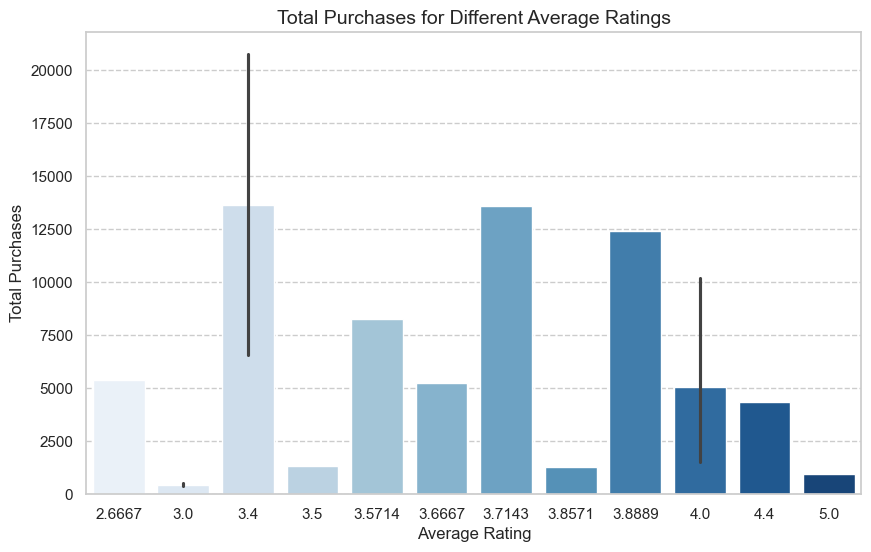

In [ ]:

query = """
SELECT 
    r.ProductID, 
    p.ProductName,
    AVG(r.Rating) AS AvgRating,
    COUNT(r.ReviewID) AS TotalReviews,
    SUM(e.Views) AS TotalViews,
    SUM(e.Clicks) AS TotalClicks,
    SUM(p.Price) AS TotalPurchases
FROM customerreviews r
JOIN EngagementData e ON r.ProductID = e.ProductID
JOIN Products p ON r.ProductID = p.ProductID
GROUP BY r.ProductID, p.ProductName;
"""

# Load data into a Pandas DataFrame
df = pd.read_sql(query, conn)


print(tabulate(df, headers='keys', tablefmt='grid'))


# Visualization: Total Purchases vs. Average Ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=df["AvgRating"], y=df["TotalPurchases"], palette="Blues")
plt.title("Total Purchases for Different Average Ratings", fontsize=14)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Total Purchases", fontsize=12)
plt.grid(axis="y", linestyle="--")
plt.show()

Customer Count by Geography

In [ ]:
query3 = """
    SELECT g.Country, g.City, COUNT(c.CustomerID) AS CustomerCount
    FROM Customers c
    JOIN Geography g ON c.GeographyID = g.GeographyID
    GROUP BY g.Country, g.City
    ORDER BY CustomerCount DESC;
"""

df3 = pd.read_sql(query3, conn)
print("Customer Count by Geography:\n")

print(tabulate(df3, headers='keys', tablefmt='grid'))


Customer Count by Geography:

+----+-------------+-----------+-----------------+
|    | Country     | City      |   CustomerCount |
+====+=============+===========+=================+
|  0 | Spain       | Madrid    |              18 |
+----+-------------+-----------+-----------------+
|  1 | Italy       | Rome      |              12 |
+----+-------------+-----------+-----------------+
|  2 | Germany     | Berlin    |              11 |
+----+-------------+-----------+-----------------+
|  3 | UK          | London    |              10 |
+----+-------------+-----------+-----------------+
|  4 | Austria     | Vienna    |              10 |
+----+-------------+-----------+-----------------+
|  5 | Netherlands | Amsterdam |               9 |
+----+-------------+-----------+-----------------+
|  6 | Belgium     | Brussels  |               9 |
+----+-------------+-----------+-----------------+
|  7 | Sweden      | Stockholm |               8 |
+----+-------------+-----------+-----------------+
|

C:\Users\kavya\AppData\Local\Temp\ipykernel_31052\4094345752.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query3, conn)


Popular Content by Engagement

Most Popular Content by Engagement:

+----+---------------+--------------+---------------+--------------+
|    | ContentType   |   TotalViews |   TotalClicks |   TotalLikes |
+====+===============+==============+===============+==============+
|  0 | Blog          |        65977 |         14300 |         2999 |
+----+---------------+--------------+---------------+--------------+
|  1 | video         |        64073 |         13803 |         3473 |
+----+---------------+--------------+---------------+--------------+
|  2 | Socialmedia   |        59936 |         12498 |         2594 |
+----+---------------+--------------+---------------+--------------+
|  3 | newsletter    |        37059 |          6350 |         1380 |
+----+---------------+--------------+---------------+--------------+


C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\1151198543.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query4, conn)
C:\Users\kavya\AppData\Local\Temp\ipykernel_52712\1151198543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ContentType", y="TotalLikes", data=df4, palette="viridis")


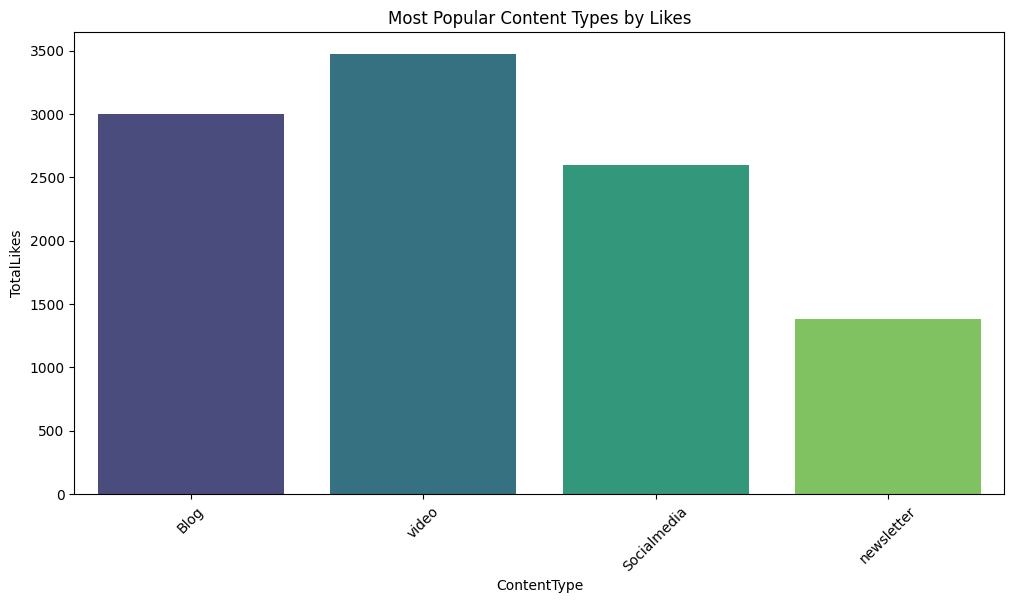

In [79]:
query4 = """
    SELECT ContentType, SUM(Views) AS TotalViews, SUM(Clicks) AS TotalClicks, SUM(Likes) AS TotalLikes
    FROM EngagementData
    GROUP BY ContentType
    ORDER BY TotalViews DESC;
"""

df4 = pd.read_sql(query4, conn)
print("Most Popular Content by Engagement:\n")
print(tabulate(df4, headers='keys', tablefmt='grid'))

plt.figure(figsize=(12, 6))
sns.barplot(x="ContentType", y="TotalLikes", data=df4, palette="viridis")
plt.title("Most Popular Content Types by Likes")
plt.xticks(rotation=45)
plt.show()


Negative Reviews and Product Performance

Low Repeat Purchase Rates (Potential Dissatisfied Customers)

In [ ]:
query4 = """
    SELECT CustomerID, COUNT(*) AS PurchaseCount
    FROM CustomerJourney
    GROUP BY CustomerID
    HAVING COUNT(*) = 1
    ORDER BY PurchaseCount ASC;
"""

df4 = pd.read_sql(query4, conn)
print("Low Repeat Purchase Rates (Potential Dissatisfied Customers):\n", df4)


Low Repeat Purchase Rates (Potential Dissatisfied Customers):
     CustomerID  PurchaseCount
0            4              1
1            5              1
2           13              1
3           17              1
4           19              1
5           20              1
6           21              1
7           22              1
8           23              1
9           24              1
10          25              1
11          29              1
12          31              1
13          32              1
14          33              1
15          34              1
16          38              1
17          40              1
18          43              1
19          45              1
20          46              1
21          47              1
22          48              1
23          49              1
24          55              1
25          56              1
26          63              1
27          65              1
28          69              1
29          70              1
30     

C:\Users\kavya\AppData\Local\Temp\ipykernel_31052\1008004883.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query4, conn)


Purchase Trends Over Time (Monthly/Seasonal Analysis)

In [ ]:
query1 = """
    SELECT DATE_FORMAT(J.VisitDate, '%Y-%m') AS Month,
           COUNT(J.JourneyID) AS TotalVisits
    FROM CustomerJourney J
    GROUP BY Month
    ORDER BY Month;
"""

df1 = pd.read_sql(query1, conn)
print("Purchase Trends Over Time (Monthly/Seasonal Analysis):\n")
print(tabulate(df1, headers='keys', tablefmt='grid'))



Purchase Trends Over Time (Monthly/Seasonal Analysis):

+----+---------+---------------+
|    | Month   |   TotalVisits |
+====+=========+===============+
|  0 | 2023-02 |             2 |
+----+---------+---------------+
|  1 | 2023-04 |             3 |
+----+---------+---------------+
|  2 | 2023-05 |             3 |
+----+---------+---------------+
|  3 | 2023-06 |             3 |
+----+---------+---------------+
|  4 | 2023-07 |             5 |
+----+---------+---------------+
|  5 | 2023-08 |             5 |
+----+---------+---------------+
|  6 | 2023-09 |             3 |
+----+---------+---------------+
|  7 | 2023-10 |             1 |
+----+---------+---------------+
|  8 | 2023-11 |             4 |
+----+---------+---------------+
|  9 | 2023-12 |             3 |
+----+---------+---------------+
| 10 | 2024-01 |             1 |
+----+---------+---------------+
| 11 | 2024-02 |             3 |
+----+---------+---------------+
| 12 | 2024-03 |             2 |
+----+---------+----

C:\Users\kavya\AppData\Local\Temp\ipykernel_31052\3632919163.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query1, conn)


Impact of Engagement on Purchase Behavior

In [ ]:
query3 = """
    SELECT E.EngagementID, 
           E.ProductID,
           P.ProductName,
           SUM(E.Views) AS TotalViews,
           SUM(E.Clicks) AS TotalClicks,
           SUM(E.Likes) AS TotalLikes,
           ROUND((SUM(E.Clicks) * 100.0) / NULLIF(SUM(E.Views), 0), 2) AS ClickThroughRate
    FROM EngagementData E
    JOIN Products P ON E.ProductID = P.ProductID
    GROUP BY E.EngagementID, E.ProductID, P.ProductName
    ORDER BY ClickThroughRate DESC;
"""

df3 = pd.read_sql(query3, conn)
print("Impact of Engagement on Purchase Behavior:\n")
print(tabulate(df3, headers='keys', tablefmt='grid'))


Impact of Engagement on Purchase Behavior:

+----+----------------+-------------+-----------------+--------------+---------------+--------------+--------------------+
|    |   EngagementID |   ProductID | ProductName     |   TotalViews |   TotalClicks |   TotalLikes |   ClickThroughRate |
+====+================+=============+=================+==============+===============+==============+====================+
|  0 |             76 |           3 | Yoga Mat        |         6205 |          2834 |          545 |              45.67 |
+----+----------------+-------------+-----------------+--------------+---------------+--------------+--------------------+
|  1 |             93 |          17 | Surfboard       |         2989 |          1283 |          147 |              42.92 |
+----+----------------+-------------+-----------------+--------------+---------------+--------------+--------------------+
|  2 |             90 |           9 | Baseball Glove  |         3338 |          1402 |         

C:\Users\kavya\AppData\Local\Temp\ipykernel_31052\1137175557.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query3, conn)


Geographical Performance of Campaigns

In [ ]:
query4 = """
    SELECT G.Country, G.City, 
           COUNT(DISTINCT E.CampaignID) AS TotalCampaigns,
           SUM(E.Views) AS TotalViews,
           SUM(E.Clicks) AS TotalClicks,
           ROUND((SUM(E.Clicks) * 100.0) / NULLIF(SUM(E.Views), 0), 2) AS ClickThroughRate
    FROM EngagementData E
    JOIN Customers C ON E.ProductID = C.CustomerID
    JOIN Geography G ON C.GeographyID = G.GeographyID
    GROUP BY G.Country, G.City
    ORDER BY TotalViews DESC;
"""

df4 = pd.read_sql(query4, conn)
print("Geographical Performance of Campaigns:\n")
print(tabulate(df4, headers='keys', tablefmt='grid'))


Geographical Performance of Campaigns:

+----+-------------+-----------+------------------+--------------+---------------+--------------------+
|    | Country     | City      |   TotalCampaigns |   TotalViews |   TotalClicks |   ClickThroughRate |
+====+=============+===========+==================+==============+===============+====================+
|  0 | Germany     | Berlin    |               11 |        43631 |         11182 |              25.63 |
+----+-------------+-----------+------------------+--------------+---------------+--------------------+
|  1 | Italy       | Rome      |                9 |        31010 |          6871 |              22.16 |
+----+-------------+-----------+------------------+--------------+---------------+--------------------+
|  2 | Belgium     | Brussels  |               12 |        30897 |          4362 |              14.12 |
+----+-------------+-----------+------------------+--------------+---------------+--------------------+
|  3 | Spain       | Mad

C:\Users\kavya\AppData\Local\Temp\ipykernel_31052\1440461783.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query4, conn)


In [ ]:
# Define SQL queries
queries = {
    "Top Customers": """
        SELECT c.CustomerID, c.CustomerName, COUNT(j.JourneyID) AS TotalInteractions, 
               SUM(e.Views) AS TotalViews, SUM(e.Clicks) AS TotalClicks
        FROM Customers c
        LEFT JOIN CustomerJourney j ON c.CustomerID = j.CustomerID
        LEFT JOIN EngagementData e ON c.CustomerID = e.ProductID
        GROUP BY c.CustomerID, c.CustomerName
        ORDER BY TotalInteractions DESC
        LIMIT 5;
    """,

    "Popular Products": """
        SELECT p.ProductID, p.ProductName, COUNT(j.JourneyID) AS TotalInteractions, 
               SUM(e.Views) AS TotalViews, SUM(e.Clicks) AS TotalClicks
        FROM Products p
        LEFT JOIN CustomerJourney j ON p.ProductID = j.ProductID
        LEFT JOIN EngagementData e ON p.ProductID = e.ProductID
        GROUP BY p.ProductID, p.ProductName
        ORDER BY TotalInteractions DESC
        LIMIT 5;
    """,

    "Customer Retention": """
        SELECT c.CustomerID, c.CustomerName, COUNT(DISTINCT j.JourneyID) AS JourneyCount
        FROM Customers c
        JOIN CustomerJourney j ON c.CustomerID = j.CustomerID
        GROUP BY c.CustomerID, c.CustomerName
        HAVING JourneyCount > 1;
    """,

    "Average Customer Rating": """
        SELECT AVG(r.Rating) AS AvgRating FROM CustomerReviews r;
    """,

    "Negative Feedback": """
        SELECT r.ReviewID, c.CustomerName, r.ProductID, r.ReviewText, r.Rating, r.SentimentLabel
        FROM CustomerReviews r
        JOIN Customers c ON r.CustomerID = c.CustomerID
        WHERE r.SentimentLabel = 'Negative'
        ORDER BY r.Rating ASC;
    """,
}

# Fetch and analyze data
insights = {}
for key, query in queries.items():
    df = pd.read_sql(query, conn)
    insights[key] = df



# Generate recommendations
recommendations = []

# 1️⃣ Top Customers Engagement
if not insights["Top Customers"].empty:
    recommendations.append("🟢 Personalize offers for top customers to boost loyalty and repeat purchases.\n")

# 2️⃣ Best-Selling Products Strategy
if not insights["Popular Products"].empty:
    recommendations.append("🔵 Increase stock and marketing for top-performing products to maximize revenue.\n")

# 3️⃣ Customer Retention
if not insights["Customer Retention"].empty:
    recommendations.append("🟡 Offer loyalty programs or special promotions to keep customers engaged.\n")

# 4️⃣ Customer Satisfaction & Ratings
avg_rating = insights["Average Customer Rating"]["AvgRating"].iloc[0] if not insights["Average Customer Rating"].empty else 0
if avg_rating < 4:
    recommendations.append("🟠 Improve product quality and customer support to enhance user satisfaction.\n")

# 5️⃣ Addressing Negative Feedback
if not insights["Negative Feedback"].empty:
    recommendations.append("🔴 Actively respond to negative reviews and address customer concerns promptly.\n")

# Display results
print("\n🔍 **Customer Insights:**")
for key, df in insights.items():
    print(f"\n📊 {key}:\n{df}")

print("\n💡 **Business Recommendations:**\n")
for rec in recommendations:
    print(rec)



🔍 **Customer Insights:**

📊 Top Customers:
   CustomerID   CustomerName  TotalInteractions  TotalViews  TotalClicks
0          15  Emma Martinez                 21     45300.0       8718.0
1           2    Sarah Brown                 12     27912.0       6412.0
2           9   Emily Thomas                 12     21723.0       7452.0
3          14  Olivia Wilson                 12     40974.0       6906.0
4           1  Emma Anderson                 10     46316.0      12398.0

📊 Popular Products:
   ProductID      ProductName  TotalInteractions  TotalViews  TotalClicks
0          8  Football Helmet                 63    123867.0      29007.0
1         20    Boxing Gloves                 63    109620.0      12429.0
2         15    Climbing Rope                 42     90600.0      17436.0
3         16            Kayak                 40    132280.0      30365.0
4          2  Fitness Tracker                 36     83736.0      19236.0

📊 Customer Retention:
    CustomerID      CustomerNa

C:\Users\kavya\AppData\Local\Temp\ipykernel_31052\2233043711.py:49: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
